# Necessary Packages :

In [1]:
import cv2
import numpy as np
import face_recognition
import dlib
import matplotlib.pyplot as plt

# Vector Database :

In [2]:
# Load Image :
my_image = cv2.imread("DSC_7253.JPG")
my_face_encoding = face_recognition.face_encodings(my_image)[0]

my_image_2 = cv2.imread("IMG-20210818-WA0026.jpg")
my_face_encoding_2 = face_recognition.face_encodings(my_image_2)[0]

my_image_3 = cv2.imread("WhatsApp Image 2021-10-21 at 11.09.52.jpeg")
my_face_encoding_3 = face_recognition.face_encodings(my_image_3)[0]


In [3]:
# Directory Consists of Person name and respective Encoding vector :
known_face_encodings = { "Mitesh": my_face_encoding,
                         "Mitesh": my_face_encoding_2,
                         "Mitesh": my_face_encoding_3}

# Convert Image to Feature vector :

In [4]:
# Convert Image to Vector of 1*128 size :

def image_to_embedding(image):
    
    location = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, location)
    
    return face_encodings

# Rocognize face :

In [5]:
# Fucntion to Recognize Face :

def recognize_face(face_image, input_embeddings):

    embeddings = image_to_embedding(face_image)    # Embedding of Input Image 
    for embedding in embeddings:

        minimum_distance = 200
        name = None

        # Loop over  names and encodings.
        for (input_name, input_embedding) in input_embeddings.items():


            euclidean_distance = np.linalg.norm(embedding-input_embedding) # Vector Norm 


            print('Euclidean distance from %s is %s' %(input_name, euclidean_distance))


            if euclidean_distance < minimum_distance:
                minimum_distance = euclidean_distance
                name = input_name
        print(minimum_distance)
        if minimum_distance < 0.55:
            return str(name)
        else:
            name = "UNKNOWN PERSON"
            return str(name)

# Haarcascade classifier : ( faster execution )

In [6]:
# Function to Work with Video files or Live cam :
def recognize_face_in_cam(input_embeddings):
    vc = cv2.VideoCapture(0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
    count=0
    while vc.isOpened():
        _, frame = vc.read()
        img = frame
        small_frame = cv2.resize(frame, (0, 0), fx=2, fy=2)
        rgb_small_frame = small_frame[:, :, ::-1]
        height, width, channels = frame.shape
        
        gray = cv2.cvtColor(rgb_small_frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        # Loop through all the faces detected 
        identities = []
        for (x, y, w, h) in faces:
            x1 = int(x*0.5)
            y1 = int(y*0.5)
            x2 = int((x+w)*0.5)
            y2 = int((y+h)*0.5)

            
            face_image = frame[max(0, y1):min(height, y2), max(0, x1):min(width, x2)]
#             face_image = frame
            identity = recognize_face(face_image, input_embeddings)
            
            
    
            if identity is not None:
                img = cv2.rectangle(frame,(x1, y1),(x2, y2),(0,0,255),2)
                cv2.rectangle(frame, (x1, y2 - 35), (x2, y2), (0, 0, 255), cv2.FILLED)
                cv2.putText(img, str(identity), (x1+6,y2-5), font, 1, (255,255,255), 2)
        
        cv2.imshow("Face Recognizer", img)
#         plt.imshow(img)
        count=count+1
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    vc.release()
    cv2.destroyAllWindows()
    

# Run Cam Function with Database dictionary :

In [7]:
recognize_face_in_cam(input_embeddings=known_face_encodings)

Euclidean distance from Mitesh is 0.3335477313743508
0.3335477313743508


QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to target thread (0x55fe2b5f30f0)

QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to target thread (0x55fe2b5f30f0)

QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to target thread (0x55fe2b5f30f0)

QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to target thread (0x55fe2b5f30f0)

QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to target thread (0x55fe2b5f30f0)

QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to target thread (0x55fe2b5f30f0)

QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to tar

QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to target thread (0x55fe2b5f30f0)

QObject::moveToThread: Current thread (0x55fe2b5f30f0) is not the object's thread (0x55fe3f581800).
Cannot move to target thread (0x55fe2b5f30f0)



Euclidean distance from Mitesh is 0.3122183262979103
0.3122183262979103
Euclidean distance from Mitesh is 0.38557825394371364
0.38557825394371364
Euclidean distance from Mitesh is 0.30948200303315193
0.30948200303315193
Euclidean distance from Mitesh is 0.3199167329903743
0.3199167329903743
Euclidean distance from Mitesh is 0.34814622963752784
0.34814622963752784
Euclidean distance from Mitesh is 0.33777491542417093
0.33777491542417093
Euclidean distance from Mitesh is 0.34296983199486886
0.34296983199486886
Euclidean distance from Mitesh is 0.3132032043798929
0.3132032043798929
Euclidean distance from Mitesh is 0.40432016491674067
0.40432016491674067
Euclidean distance from Mitesh is 0.3600574097644904
0.3600574097644904
Euclidean distance from Mitesh is 0.36188271309589115
0.36188271309589115
Euclidean distance from Mitesh is 0.335435202850239
0.335435202850239
Euclidean distance from Mitesh is 0.3202046767639933
0.3202046767639933
Euclidean distance from Mitesh is 0.3405285862904322

In [29]:
def _css_to_rect(css):
    """
    Convert a tuple in (top, right, bottom, left) order to a dlib `rect` object
    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :return: a dlib `rect` object
    """
    return dlib.rectangle(css[3], css[0], css[1], css[2])
face_location_rec = _css_to_rect(face_location[0])
face_location_rec

rectangle(996,869,2147,2019)

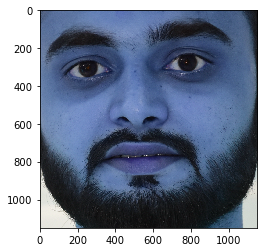

In [25]:
plt.imshow(my_image[869:2019,996:2147])

869 2147 2019 996


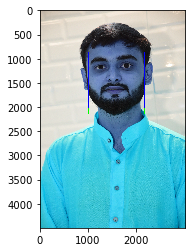

In [32]:
import matplotlib.pyplot as plt
print(x,y,w,h)
cv2.rectangle(my_image, (996,869), (2147,2019), (0,0,255),4)
plt.imshow(my_image)

# Using MTCNN : (very slow)

In [6]:
import mtcnn
from mtcnn.mtcnn import MTCNN
mtcnn_model = MTCNN()

2021-10-29 13:20:12.077599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mitesh/anaconda3/envs/tf/lib/python3.8/site-packages/cv2/../../lib64:
2021-10-29 13:20:12.077635: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-10-29 13:20:27.039163: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-29 13:20:27.039195: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (R540U): /proc/driver/nvidia/version does not exist
2021-10-29 13:20:27.039653: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (on

In [7]:
# trial :
def recognize_face_in_cam(input_embeddings):
#     cv2.namedWindow("Face Recognizer")
    vc = cv2.VideoCapture(0)
    font = cv2.FONT_HERSHEY_SIMPLEX
#     face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
    count=0
    while vc.isOpened():
        _, frame = vc.read()
        img = frame
#         print(frame.shape)
        small_frame = cv2.resize(frame, (0, 0), fx=2, fy=2)
        rgb_small_frame = small_frame[:, :, ::-1]
        height, width, channels = frame.shape
        
        
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#         gray = cv2.cvtColor(rgb_small_frame, cv2.COLOR_BGR2GRAY)
#         faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        faces = mtcnn_model.detect_faces(rgb_small_frame)
        print(faces)


        # Loop through all the faces detected 
        for face in range(len(faces)):
            print(faces[face]['box'])
            identities = []
#             for (x, y, w, h) in faces:
            x,y,w,h = faces[face]['box']
    #             x1 = x
    #             y1 = y
    #             x2 = x+w
    #             y2 = y+h
            x1 = int(x*0.5)
            y1 = int(y*0.5)
            x2 = int((x+w)*0.5)
            y2 = int((y+h)*0.5)



#             face_image = frame[max(0, y1):min(height, y2), max(0, x1):min(width, x2)]
            face_image = frame
            identity = recognize_face(face_image, input_embeddings)



            if identity is not None:
                img = cv2.rectangle(frame,(x1, y1),(x2, y2),(0,0,255),2)
                cv2.rectangle(frame, (x1, y2 - 35), (x2, y2), (0, 0, 255), cv2.FILLED)
                cv2.putText(img, str(identity), (x1+6,y2-5), font, 1, (255,255,255), 2)

    #         key = cv2.waitKey(100)
        cv2.imshow("Face Recognizer", img)
    #         cv2.imwrite("images/User_" + str(count) + ".jpg", img)
        count=count+1
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    vc.release()
    cv2.destroyAllWindows()


In [8]:
recognize_face_in_cam(input_embeddings=known_face_encodings)

2021-10-29 13:20:35.908879: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


[{'box': [449, 447, 374, 444], 'confidence': 0.9990791082382202, 'keypoints': {'left_eye': (558, 615), 'right_eye': (723, 609), 'nose': (642, 687), 'mouth_left': (576, 779), 'mouth_right': (715, 777)}}]
[449, 447, 374, 444]
Euclidean distance from Mitesh is 0.4253477279625975
0.4253477279625975


QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to target thread (0x5585eac10ec0)

QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to target thread (0x5585eac10ec0)

QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to target thread (0x5585eac10ec0)

QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to target thread (0x5585eac10ec0)

QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to target thread (0x5585eac10ec0)

QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to target thread (0x5585eac10ec0)

QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to tar

QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to target thread (0x5585eac10ec0)

QObject::moveToThread: Current thread (0x5585eac10ec0) is not the object's thread (0x5585fb4c7d20).
Cannot move to target thread (0x5585eac10ec0)



[{'box': [463, 453, 356, 424], 'confidence': 0.9997779726982117, 'keypoints': {'left_eye': (561, 616), 'right_eye': (722, 608), 'nose': (645, 688), 'mouth_left': (577, 777), 'mouth_right': (715, 773)}}]
[463, 453, 356, 424]
Euclidean distance from Mitesh is 0.39362478184620575
0.39362478184620575
[{'box': [450, 448, 366, 436], 'confidence': 0.9991981387138367, 'keypoints': {'left_eye': (559, 617), 'right_eye': (720, 611), 'nose': (642, 685), 'mouth_left': (576, 776), 'mouth_right': (712, 774)}}]
[450, 448, 366, 436]
Euclidean distance from Mitesh is 0.4144192062865453
0.4144192062865453
[{'box': [435, 450, 381, 457], 'confidence': 0.9998953342437744, 'keypoints': {'left_eye': (550, 618), 'right_eye': (717, 613), 'nose': (638, 690), 'mouth_left': (563, 787), 'mouth_right': (708, 784)}}]
[435, 450, 381, 457]
Euclidean distance from Mitesh is 0.40925441769460785
0.40925441769460785


In [51]:
for face in face_location:
    x,y,w,h = face[3],face[0],face[1],face[2]
    print(x,y,w,h)

1975 573 2161 758
593 634 778 820
3668 779 3854 965
3028 614 3214 800
1294 634 1480 820
2512 676 2698 861
82 528 349 795
